## Packages Installallation

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries 

In [6]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

## Data Load 

In [7]:
class EcomDataLoader:
    """
    A class to load E-commerce data from an Excel file into Pandas DataFrames.
    """
    
    def __init__(self, file_path):
        """
        Initializes the EcommerceDataLoader class with the file path to the Excel file.
        """
        self.file_path = file_path
        
    def load_fact_table(self):
        """
        Loads the fact table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Fact_table')
    
    def load_transaction_dim(self):
        """
        Loads the transaction dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Trans_dim')
    
    def load_item_dim(self):
        """
        Loads the item dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Item_dim')
    
    def load_customer_dim(self):
        """
        Loads the customer dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Coustomer_dim')
    
    def load_time_dim(self):
        """
        Loads the time dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Time_dim')
    
    def load_store_dim(self):
        """
        Loads the store dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Store_dim')

# create an instance of this class and use its methods
data_loader = EcomDataLoader(r'G:\1. NSU\3. DDBMS\Project\e_commerece_data.xlsx')
fact_table = data_loader.load_fact_table()
transaction_dim = data_loader.load_transaction_dim()
item_dim = data_loader.load_item_dim()
customer_dim = data_loader.load_customer_dim()
time_dim = data_loader.load_time_dim()
store_dim = data_loader.load_store_dim()

In [8]:
fact_table.head(5)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


## Database Connection 

In [24]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="postgres",
                                           user = "postgres",
                                           password = "12345",
                                           host = "localhost",
                                           port = "5432")

    def getConnection(self):
        print("Successfully Connected!")
        return self.connection
    
con = PostgresConnection().getConnection()

Successfully Connected!


## Insert Data into Tables 

In [25]:
class InsertData:
    def __init__(self, con):
        self.con = con
        self.cur = self.con.cursor()

    def insert_trans_dim(self, values):
        insert_stmt = "INSERT INTO ecomdb.trans_dim(payment_key, trans_type, bank_name) VALUES (%s, %s, %s)"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into trans_dim table")

    def insert_store_dim(self, values):
        insert_stmt = "INSERT INTO ecomdb.store_dim( store_key, division, district, upazila) VALUES (%s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into store_dim table")

    def insert_item_dim(self, values):
        insert_stmt = "INSERT INTO ecomdb.item_dim(item_key, item_name, \"desc\", unit_price, man_country, supplier, unit) VALUES (%s, %s, %s, %s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into item_dim table")

    def insert_customer_dim(self, values):
        insert_stmt = "INSERT INTO ecomdb.customer_dim(customer_key, name, contact_no, nid)VALUES (%s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into customer_dim table")

    def insert_time_dim(self, values):
        insert_stmt = "INSERT INTO ecomdb.time_dim(time_key, date, hour, day, week, month, quarter, year)VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into time_dim table")

    def insert_fact_table(self, values):
        insert_stmt = "INSERT INTO ecomdb.fact_table(payment_key, customer_key, time_key, item_key, store_key, quantity, unit, unit_price, total_price)VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) ON CONFLICT DO NOTHING;"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into fact_table")
        

    def commit(self):
        
        try:
            self.con.commit()
        except:
            self.con.rollback()
            raise


    def close(self):
        self.cur.close()
        self.con.close()


## Inserting to the Database 

In [26]:
try:
    data_inserter = InsertData(con)
    data_inserter.insert_trans_dim(transaction_dim.values)
    data_inserter.insert_store_dim(store_dim.values)
    data_inserter.insert_item_dim(item_dim.values)
    data_inserter.insert_customer_dim(customer_dim.values)
    data_inserter.insert_time_dim(time_dim.values)
    data_inserter.insert_fact_table(fact_table.values)
    data_inserter.commit()
except Exception as e:
    print(f"Error: {str(e)}")
    con.rollback()
finally:
    data_inserter.close()


100%|██████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<?, ?it/s]


39 rows inserted into trans_dim table


100%|█████████████████████████████████████████████████████████████████████████████| 726/726 [00:00<00:00, 21261.45it/s]


726 rows inserted into store_dim table


100%|█████████████████████████████████████████████████████████████████████████████| 264/264 [00:00<00:00, 10124.22it/s]


264 rows inserted into item_dim table


100%|███████████████████████████████████████████████████████████████████████████| 9191/9191 [00:00<00:00, 20631.08it/s]


9191 rows inserted into customer_dim table


100%|█████████████████████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 19603.79it/s]


99999 rows inserted into time_dim table


100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:05<00:00, 15253.35it/s]

1000000 rows inserted into fact_table


# *** OLAP Query *** 

#### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table  

In [27]:
class SalesByDivision:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_division(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            select_stmt = """
            SELECT s.division, SUM(CAST(t.total_price AS DECIMAL))
            FROM ecomdb.fact_table t
            JOIN ecomdb.store_dim s on s.store_key=t.store_key
            JOIN ecomdb.time_dim tim on tim.time_key=t.time_key
            WHERE tim.month=12
            GROUP BY s.division
            ORDER BY s.division
            """
            cur.execute(select_stmt)
            records = cur.fetchall()

            cur.execute("COMMIT")

            cur.close()
            
            return records

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            self.db_connection.close()

db_conn = PostgresConnection().getConnection()
sales_division = SalesByDivision(db_conn)
sales_by_division_data = sales_division.get_sales_by_division()
print(sales_by_division_data)

Successfully Connected!
[('BARISAL', Decimal('2737')), ('CHITTAGONG', Decimal('4845')), ('DHAKA', Decimal('13260')), ('KHULNA', Decimal('3162')), ('RAJSHAHI', Decimal('4522')), ('RANGPUR', Decimal('3009')), ('SYLHET', Decimal('1360'))]


#### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [28]:
class SalesByBankAndCustomer:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_bank_and_customer(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")
            
            select_stmt = """
            SELECT
                trans_dim.bank_name AS bank_name,
                customer_dim.name AS customer_name,
                trans_dim.trans_type AS transaction_type,
                SUM(CAST(fact_table.total_price AS INTEGER)) AS total_sale_price
            FROM
                ecomdb.fact_table
                JOIN ecomdb.trans_dim ON fact_table.payment_key = trans_dim.payment_key
                JOIN ecomdb.customer_dim ON fact_table.customer_key = customer_dim.customer_key
            GROUP BY
                ROLLUP(trans_dim.bank_name, customer_dim.name, trans_dim.trans_type)
            """

            cur.execute(select_stmt)

            records = cur.fetchall()

            cur.execute("COMMIT")

            df = pd.DataFrame(records, columns=['bank_name', 'customer_name', 'transaction_type', 'total_sale_price'])
            
            return df

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            cur.close()
            self.db_connection.close()

db_conn = PostgresConnection().getConnection()
sales_by_bank_and_customer = SalesByBankAndCustomer(db_conn)
sales_by_bank_and_customer_data = sales_by_bank_and_customer.get_sales_by_bank_and_customer()
print(sales_by_bank_and_customer_data)

Successfully Connected!
                         bank_name      customer_name transaction_type  \
0                             None               None             None   
1        Dutch-Bangla Bank Limited            gulshan             card   
2       United Commercial Bank Ltd         dhakhadevi             card   
3               Trust Bank Limited         rajl /raju             card   
4               Padma Bank Limited    saraswati thapa             card   
...                            ...                ...              ...   
336067           Bank Asia Limited       kajal@sundri             card   
336068           BRAC Bank Limited          km vijeta             card   
336069     Mercantile Bank Limited             sabnam             card   
336070     NRB Commercial Bank Ltd     baban @ suresh             card   
336071       Citizens Bank Limited  mala devi @ nisha             card   

        total_sale_price  
0               377298.0  
1                    NaN  
2     

#### Q3: Total sales in Barisal for item 'Pepsi - 12 oz cans' 

In [29]:
class SalesByDistrict:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_district(self, district):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = f"""
            SELECT s.district, SUM(CAST(t.total_price AS DECIMAL))
            FROM ecomdb.fact_table t
            JOIN ecomdb.store_dim s on s.store_key=t.store_key
            JOIN ecomdb.time_dim tim on tim.time_key=t.time_key
            WHERE s.district = '{district}'
            GROUP BY s.district
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return records

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the SalesByDistrict class
db_conn = PostgresConnection().getConnection()
sales_district = SalesByDistrict(db_conn)
sales_by_district_data = sales_district.get_sales_by_district('Barisal')
print(f"Total sales in Barisal: {sales_by_district_data}")


# execute the second query
con = PostgresConnection().getConnection()
cur = con.cursor()

# execute the query
try:
    cur.execute("BEGIN")
    select_stmt = "SELECT s.district, SUM(CAST(t.total_price AS DECIMAL)) " \
                  "FROM ecomdb.fact_table t " \
                  "JOIN ecomdb.store_dim s ON s.store_key = t.store_key " \
                  "JOIN ecomdb.time_dim tim ON tim.time_key = t.time_key " \
                  "WHERE s.district = 'Chittagong' " \
                  "GROUP BY s.district"
    cur.execute(select_stmt)
    records = cur.fetchall()
    cur.execute("COMMIT")
except:
    cur.execute("ROLLBACK")
    raise

print(f"Total sales in Chittagong: {records}")

cur.close()
con.close()

Successfully Connected!
Total sales in Barisal: []
Successfully Connected!
Total sales in Chittagong: []


#### Q4: Total sales in 2015 for supplier 'BIGSO AB' 

In [30]:
class SalesByYear:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_year(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = """
            SELECT SUM(f.total_price) as total_sale_price
            FROM ecomdb.fact_table f
            JOIN ecomdb.time_dim t ON f.time_key = t.time_key
            WHERE t.year = 2015
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return records

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the SalesByYear class
db_conn = PostgresConnection().getConnection()
sales_year = SalesByYear(db_conn)
sales_by_year_data = sales_year.get_sales_by_year()
print(f"Total sales in 2015: {sales_by_year_data}")

Successfully Connected!
Total sales in 2015: [(53482,)]


#### Q5: Total sales of Dhaka in 2015 

In [31]:
class SalesByDistrict:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_district(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            select_stmt = """
            SELECT SUM(f.total_price) as total_sale_price
            FROM ecomdb.fact_table f
            JOIN ecomdb.time_dim t ON f.time_key = t.time_key
            JOIN ecomdb.store_dim s ON f.store_key = s.store_key
            WHERE s.district = 'Dhaka' AND t.year = 2015
            """
            cur.execute(select_stmt)
            records = cur.fetchall()

            cur.execute("COMMIT")
            cur.close()
            
            return records

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            self.db_connection.close()

db_conn = PostgresConnection().getConnection()
sales_district = SalesByDistrict(db_conn)
sales_by_district_data = sales_district.get_sales_by_district()
print(f"Total sales of Dhaka in 2015: {sales_by_district_data}")

Successfully Connected!
Total sales of Dhaka in 2015: [(None,)]


#### Q6: For each store(item supplier), what are the top three products offered that are most often purchased? 

In [32]:
class SalesByStoreItem:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_store_item(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            query = """
            SELECT store_dim.store_key AS Store, 
                   item_dim.item_name AS Item, 
                   SUM(fact_table.quantity) AS Quantity_Sold
            FROM ecomdb.fact_table
            JOIN ecomdb.store_dim ON fact_table.store_key = store_dim.store_key
            JOIN ecomdb.item_dim ON fact_table.item_key = item_dim.item_key
            GROUP BY store_dim.store_key, item_dim.item_name
            ORDER BY store_dim.store_key, SUM(fact_table.quantity) DESC
            LIMIT 3;
            """
            cur.execute(query)

            results_df = pd.DataFrame(cur.fetchall(), columns=['Store', 'Item', 'Quantity Sold'])

            cur.execute("COMMIT")

            cur.close()

            return results_df

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            self.db_connection.close()
db_conn = PostgresConnection().getConnection()
sales_store_item = SalesByStoreItem(db_conn)
sales_by_store_item_data = sales_store_item.get_sales_by_store_item()
print(sales_by_store_item_data)

db_conn.close()

Successfully Connected!
   Store                                 Item  Quantity Sold
0  S0001                   Pepsi - 12 oz cans             92
1  S0001  Muscle Milk Protein Shake Van. 11oz             90
2  S0001     Hefty Supreme Foam Plates 6 inch             78


#### Q7: What products have been sold through card or mobile since X days? 

In [33]:
class RecentItems:
    def __init__(self, db_connection, days):
        self.db_connection = db_connection
        self.days = days
    
    def get_recent_items(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")
            select_stmt = f"""
            SELECT DISTINCT ecomdb.item_dim.item_name
            FROM ecomdb.fact_table
            JOIN ecomdb.time_dim ON ecomdb.fact_table.time_key = ecomdb.time_dim.time_key
            JOIN ecomdb.trans_dim ON ecomdb.fact_table.payment_key = ecomdb.trans_dim.payment_key
            JOIN ecomdb.item_dim ON ecomdb.fact_table.item_key = ecomdb.item_dim.item_key
            WHERE (ecomdb.trans_dim.trans_type = 'card' OR ecomdb.trans_dim.trans_type = 'mobile')
                AND ecomdb.time_dim.date >= current_date - INTERVAL '{self.days} days'
            """
            cur.execute(select_stmt)
            records = cur.fetchall()
            cur.execute("COMMIT")
            cur.close()
            
            return [record[0] for record in records]

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            self.db_connection.close()

db_conn = PostgresConnection().getConnection()
recent_items = RecentItems(db_conn, 5)
recent_items_data = recent_items.get_recent_items()
print(f"Recent items sold via card or mobile in the last 5 days: {recent_items_data}")

Successfully Connected!
Error occurred: operator does not exist: text >= timestamp without time zone
LINE 8:                 AND ecomdb.time_dim.date >= current_date - I...
                                                 ^
HINT:  No operator matches the given name and argument types. You might need to add explicit type casts.

Recent items sold via card or mobile in the last 5 days: None


#### Q8: What season(quarter) is the worst for each product item? 

In [34]:
class WorstQuarters:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_worst_quarters(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            query = """
            SELECT ecomdb.item_dim.item_name, ecomdb.time_dim.quarter,
                SUM(ecomdb.fact_table.quantity) AS quantity_sales
            FROM ecomdb.fact_table
            JOIN ecomdb.item_dim ON ecomdb.fact_table.item_key = ecomdb.item_dim.item_key
            JOIN ecomdb.time_dim ON ecomdb.fact_table.time_key = ecomdb.time_dim.time_key
            GROUP BY ROLLUP(ecomdb.item_dim.item_name, ecomdb.time_dim.quarter)
            HAVING ecomdb.item_dim.item_name IS NOT NULL AND ecomdb.time_dim.quarter IS NOT NULL
            ORDER BY ecomdb.item_dim.item_name, SUM(ecomdb.fact_table.quantity) ASC
            """
            cur.execute(query)

            results_df = pd.DataFrame(cur.fetchall(), columns=['Item', 'Quarter', 'Quantity Sales'])

            worst_quarters = {}
            for index, row in results_df.iterrows():
                item = row['Item']
                quarter = row['Quarter']
                sales = row['Quantity Sales']
                if item not in worst_quarters:
                    worst_quarters[item] = quarter

                else:
                    if sales < results_df.loc[(results_df['Item'] == item) & (results_df['Quarter'] == worst_quarters[item]), 'Quantity Sales'].values[0]:
                        worst_quarters[item] = quarter

            worst_quarters_df = pd.DataFrame(worst_quarters.items(), columns=['Item', 'Worst Quarter'])

            cur.execute("COMMIT")
            cur.close()

            return worst_quarters_df

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            self.db_connection.close()

db_conn = PostgresConnection().getConnection()
worst_quarters = WorstQuarters(db_conn)
worst_quarters_data = worst_quarters.get_worst_quarters()
print("Worst quarters for each product:")
print(worst_quarters_data)

db_conn.close()

Successfully Connected!
Worst quarters for each product:
                                      Item Worst Quarter
0          100% Juice Box Variety 6.75 oz             Q1
1               A&W Root Beer - 12 oz cans            Q2
2          A&W Root Beer Diet - 12 oz cans            Q4
3                     Advil 2 pill packets            Q1
4            All Purpose Cleaner 409 Spray            Q1
..                                     ...           ...
254        Welch's 100% Juice Variety10 oz            Q2
255     Wint O Green LifeSavers Sugar Free            Q1
256        Wonderful Pistachios (in shell)            Q1
257  Yoplait Original Yogurt Variety Pack             Q1
258            Zoo Animal Cookies/Crackers            Q1

[259 rows x 2 columns]


#### Q9: Break down the total sales of items geographically (division-wise). 

In [35]:
class SalesByDivision:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_division(self):
        try:
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")
            query = """
            SELECT ecomdb.item_dim.item_name, ecomdb.store_dim.division, SUM(ecomdb.fact_table.total_price) AS total_sales
            FROM ecomdb.fact_table
            JOIN ecomdb.item_dim ON ecomdb.fact_table.item_key = ecomdb.item_dim.item_key
            JOIN ecomdb.store_dim ON ecomdb.fact_table.store_key = ecomdb.store_dim.store_key
            GROUP BY ROLLUP(ecomdb.item_dim.item_name, ecomdb.store_dim.division)
            HAVING ecomdb.item_dim.item_name IS NOT NULL AND ecomdb.store_dim.division IS NOT NULL
            ORDER BY ecomdb.item_dim.item_name, SUM(ecomdb.fact_table.total_price) DESC
            """
            cur.execute(query)
            records = cur.fetchall()
            cur.execute("COMMIT")
            cur.close()

            results_df = pd.DataFrame(records, columns=['Item', 'Division', 'Total Sales'])
            
            return results_df

        except Exception as e:
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            self.db_connection.close()
            
db_conn = PostgresConnection().getConnection()
sales_by_division = SalesByDivision(db_conn)
sales_by_division_data = sales_by_division.get_sales_by_division()
print(sales_by_division_data)

db_conn.close()

Successfully Connected!
                                 Item    Division  Total Sales
0     100% Juice Box Variety 6.75 oz     RAJSHAHI          NaN
1     100% Juice Box Variety 6.75 oz        DHAKA          NaN
2     100% Juice Box Variety 6.75 oz       KHULNA          NaN
3     100% Juice Box Variety 6.75 oz      RANGPUR          NaN
4     100% Juice Box Variety 6.75 oz       SYLHET          NaN
...                               ...         ...          ...
1808      Zoo Animal Cookies/Crackers     BARISAL          NaN
1809      Zoo Animal Cookies/Crackers      SYLHET          NaN
1810      Zoo Animal Cookies/Crackers  CHITTAGONG          NaN
1811      Zoo Animal Cookies/Crackers      KHULNA          NaN
1812      Zoo Animal Cookies/Crackers     RANGPUR          NaN

[1813 rows x 3 columns]


#### Q10: What are the average sales of products sales per store monthly? 

In [36]:
class SalesByMonth:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
    
    def execute_query(self):
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()
        query = """
        SELECT ecomdb.store_dim.store_key, ecomdb.time_dim.month, AVG(ecomdb.fact_table.total_price) AS avg_sales
        FROM ecomdb.fact_table
        JOIN ecomdb.store_dim ON ecomdb.fact_table.store_key = ecomdb.store_dim.store_key
        JOIN ecomdb.time_dim ON ecomdb.fact_table.time_key = ecomdb.time_dim.time_key
        GROUP BY ROLLUP(ecomdb.store_dim.store_key, ecomdb.time_dim.month)
        HAVING ecomdb.store_dim.store_key IS NOT NULL AND ecomdb.time_dim.month IS NOT NULL
        ORDER BY ecomdb.store_dim.store_key, ecomdb.time_dim.month
        """
        self.cur.execute(query)
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Store', 'Month', 'Avg Sales'])
    
    def print_results(self):
        print(self.results_df)
    
    def close_connection(self):
        self.cur.close()
        self.con.close()
        
sales_by_month = SalesByMonth()
sales_by_month.execute_query()
sales_by_month.print_results()
sales_by_month.close_connection()

Successfully Connected!
      Store  Month             Avg Sales
0     S0001      1  127.5000000000000000
1     S0001      2                  None
2     S0001      3  102.0000000000000000
3     S0001      4  110.5000000000000000
4     S0001      5                  None
...     ...    ...                   ...
8707  S0099      8  170.0000000000000000
8708  S0099      9                  None
8709  S0099     10                  None
8710  S0099     11                  None
8711  S0099     12                  None

[8712 rows x 3 columns]


## Data Visualization 

#### 1. Total Revenue of Top five (5) Products 

Successfully Connected!


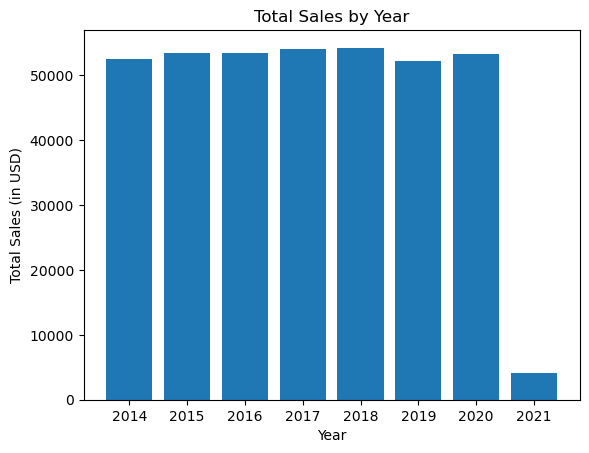

In [45]:
class TotalSalesByYear:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
        
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        # Write the query
        query = '''
            SELECT time_dim.year AS year, SUM(fact_table.total_price) AS total_sales
            FROM ecomdb.fact_table
            JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
            GROUP BY time_dim.year
            ORDER BY time_dim.year
        '''

        # Execute the query
        self.cur.execute(query)

        # Fetch the results as a Pandas dataframe
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Year', 'Total Sales'])
        
    def generate_visualization(self):
        # Create a bar plot with total sales
        plt.bar(self.results_df['Year'], self.results_df['Total Sales'])
        plt.title('Total Sales by Year')
        plt.xlabel('Year')
        plt.ylabel('Total Sales (in USD)')
        plt.show()
        
    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()
        
total_sales_by_year = TotalSalesByYear()
total_sales_by_year.execute_query()
total_sales_by_year.generate_visualization()
total_sales_by_year.close_connection()

#### 2. Top 10 Items by Average Price and Revenue Over Time 

Successfully Connected!


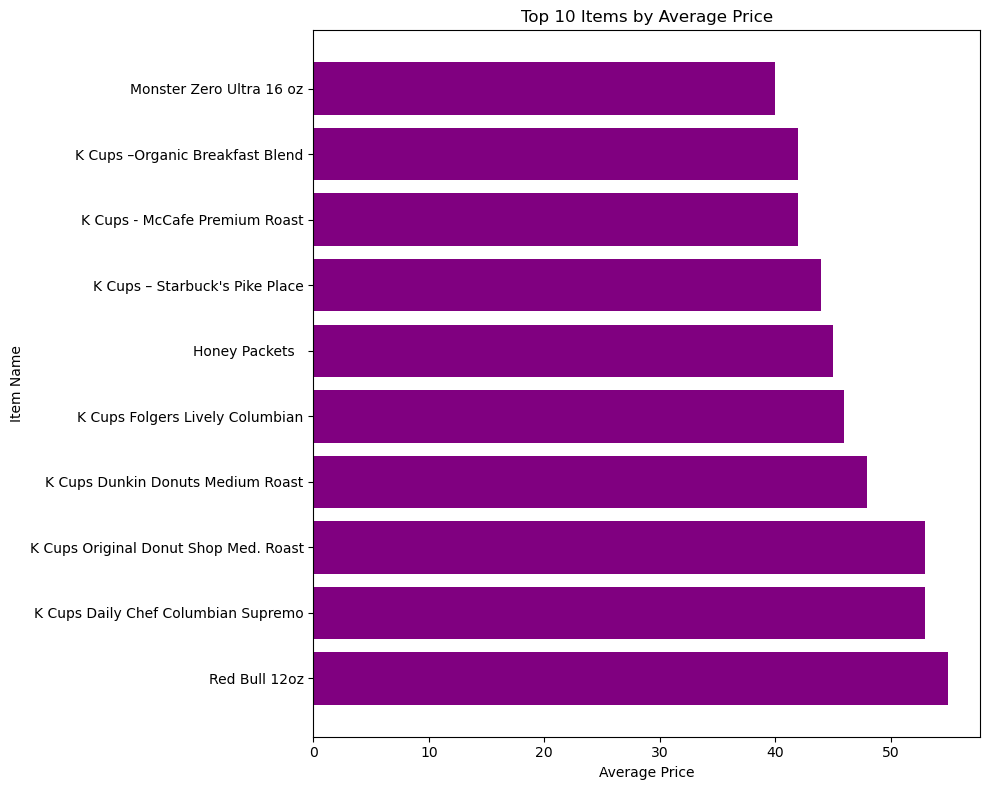

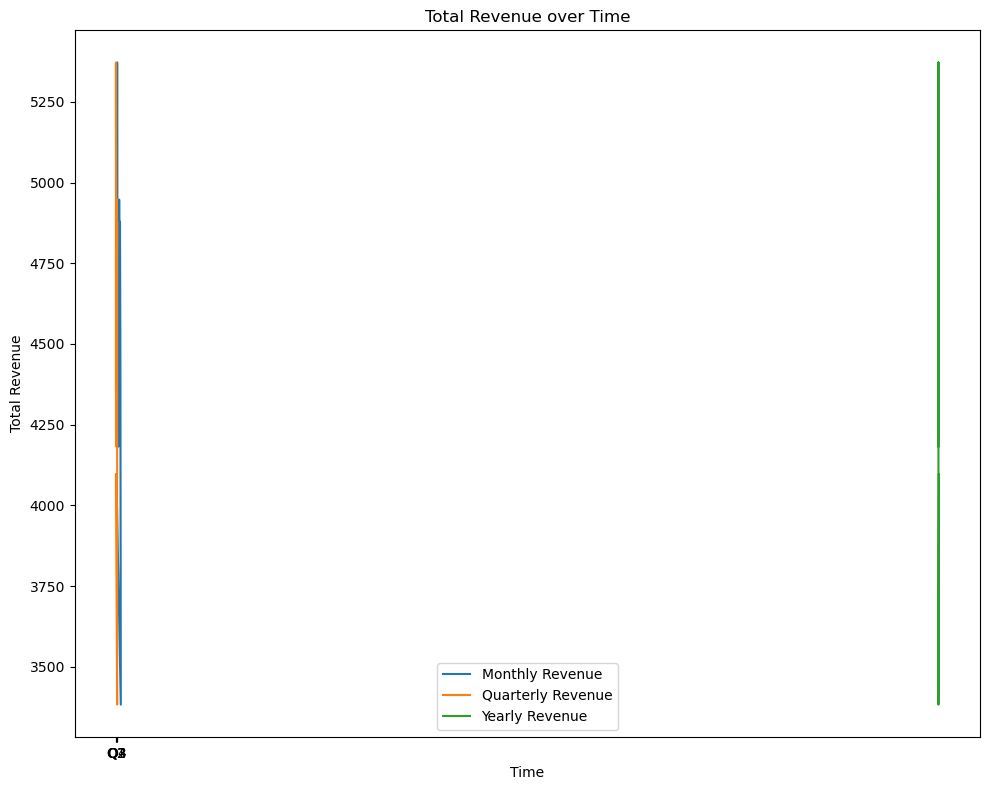

In [47]:
class FinancialAnalytics:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
        
    def execute_query(self):
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        item_query = '''
            SELECT item_name, AVG(unit_price) AS average_price
            FROM ecomdb.item_dim
            GROUP BY item_name
            ORDER BY average_price DESC
            LIMIT 10;
        '''
        time_query = '''
            SELECT year, quarter, month, SUM(total_price) AS total_revenue
            FROM ecomdb.fact_table
            JOIN ecomdb.time_dim ON ecomdb.fact_table.time_key = ecomdb.time_dim.time_key
            GROUP BY year, quarter, month
            ORDER BY year, quarter, month
        '''

        self.cur.execute(item_query)

        self.item_results_df = pd.DataFrame(self.cur.fetchall(), columns=['Item Name', 'Average Price'])

        self.cur.execute(time_query)

        self.time_results_df = pd.DataFrame(self.cur.fetchall(), columns=['Year', 'Quarter', 'Month', 'Total Revenue'])


    def generate_visualization(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.barh(self.item_results_df['Item Name'], self.item_results_df['Average Price'], color='purple')
        ax.set_xlabel('Average Price')
        ax.set_ylabel('Item Name')
        ax.set_title('Top 10 Items by Average Price')
        plt.tight_layout()
        
        fig, ax = plt.subplots(figsize=(10, 8))
        
        last_year_data = self.time_results_df.tail(12)
        
        ax.plot(last_year_data['Month'], last_year_data['Total Revenue'], label='Monthly Revenue')
        ax.plot(last_year_data['Quarter'], last_year_data['Total Revenue'], label='Quarterly Revenue')
        ax.plot(last_year_data['Year'], last_year_data['Total Revenue'], label='Yearly Revenue')
        ax.set_xlabel('Time')
        ax.set_ylabel('Total Revenue')
        ax.set_title('Total Revenue over Time')
        ax.legend()
        plt.tight_layout()

    def close_connection(self):
        self.cur.close()
        self.con.close()

financial_analytics = FinancialAnalytics()
financial_analytics.execute_query()
financial_analytics.generate_visualization()
financial_analytics.close_connection()


### 3. Distrution of Total Revenue by Customer 

Successfully Connected!


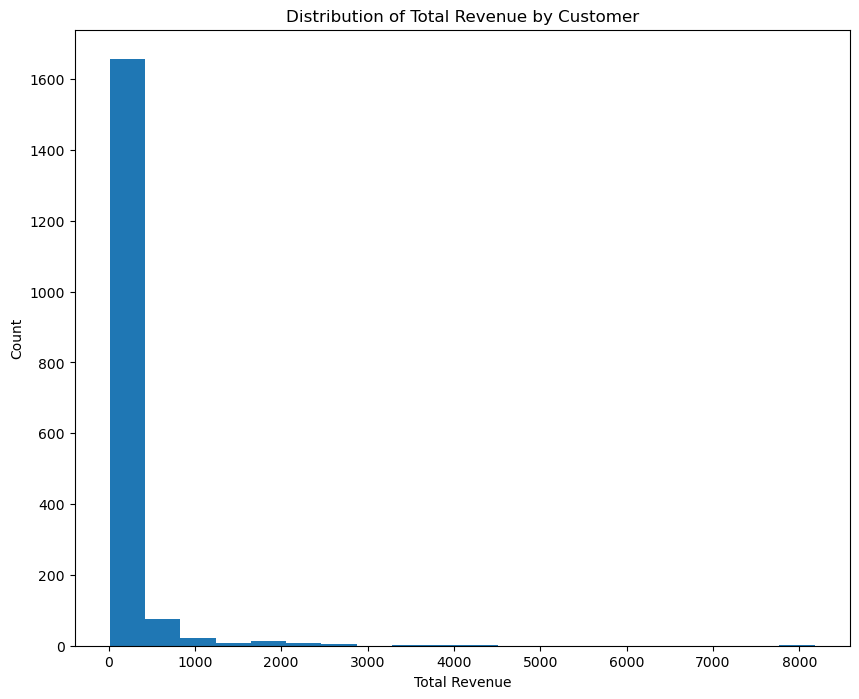

In [48]:
class TotalRevenueByCustomer:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
    
    def execute_query(self):
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        query = '''
            SELECT customer_dim.name, SUM(fact_table.total_price) AS total_revenue
            FROM ecomdb.fact_table
            JOIN ecomdb.customer_dim ON fact_table.customer_key = customer_dim.customer_key
            GROUP BY customer_dim.name
            ORDER BY total_revenue DESC
        '''

        self.cur.execute(query)

        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Customer Name', 'Total Revenue'])

    def generate_visualization(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.hist(self.results_df['Total Revenue'], bins=20)
        ax.set_xlabel('Total Revenue')
        ax.set_ylabel('Count')
        ax.set_title('Distribution of Total Revenue by Customer')
        plt.show()

    def close_connection(self):
        self.cur.close()
        self.con.close()

total_revenue_by_customer = TotalRevenueByCustomer()
total_revenue_by_customer.execute_query()
total_revenue_by_customer.generate_visualization()
total_revenue_by_customer.close_connection()

## ***Data Warehouse Assignment*** 

### Find My probable Analytics

##### Left 7 digit of my ID: 2315034
##### Mod Result: 2315034 % 5 = 4
##### Add 1 with Mod Value: 4 + 1 = 5
        
##### So the Analytics will be 5 (Inventory).

## 5. item and time Dimensional Inventory Analytics.

In [55]:
def total_sales_over_time():
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = '''
    SELECT date_trunc('day', time_dim.date) as date, SUM(fact_table.total_price) as total_sales
    FROM ecomdb.fact_table
    JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
    GROUP BY date_trunc('day', time_dim.date)
    ORDER BY date_trunc('day', time_dim.date)
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['date', 'total_sales'])
    conn.close()
    return df

def total_units_sold_over_time():
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = '''
    SELECT DATE_TRUNC('day', time_dim.date) as date, SUM(fact_table.quantity) as total_units
    FROM ecomdb.fact_table
    JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
    GROUP BY DATE_TRUNC('day', time_dim.date)
    ORDER BY DATE_TRUNC('day', time_dim.date)
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['date', 'total_units'])
    conn.close()
    return df

def avg_price_per_unit_over_time():
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = '''
    SELECT DATE_TRUNC('day', time_dim.date) as date, AVG(fact_table.unit_price) as avg_price_per_unit
    FROM ecomdb.fact_table
    JOIN ecomdb.time_dim ON fact_table.time_key = time_dim.time_key
    GROUP BY DATE_TRUNC('day', time_dim.date)
    ORDER BY DATE_TRUNC('day', time_dim.date)
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['date', 'avg_price_per_unit'])
    conn.close()
    return df

def plot_total_sales_over_time():
    df = total_sales_over_time()
    plt.plot(df['date'], df['total_sales'])
    plt.title('Total Sales over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()

def plot_total_units_sold_over_time():
    df = total_units_sold_over_time()
    plt.plot(df['date'], df['total_units'])
    plt.title('Total Units Sold over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Units Sold')
    plt.show()

def plot_avg_price_per_unit_over_time():
    df = avg_price_per_unit_over_time()
    plt.plot(df['date'], df['avg_price_per_unit'])
    plt.title('Average Price per Unit over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price per Unit')
    plt.show()

In [ ]:
total_sales_over_time()
total_units_sold_over_time()
avg_price_per_unit_over_time()
plot_total_sales_over_time()
plot_total_units_sold_over_time()
plot_avg_price_per_unit_over_time()

In [58]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement geopandas (from versions: none)
ERROR: No matching distribution found for geopandas


In [50]:
import geopandas as gpd
from shapely.geometry import Point

def sales_by_store_location(start_date, end_date, chart_type='bar'):
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()

    query = f'''
        SELECT ecomdb.store_dim.upazila, SUM(ecomdb.fact_table.total_price) as total_sales
        FROM ecomdb.fact_table
        JOIN ecomdb.store_dim ON ecomdb.fact_table.store_key = ecomdb.store_dim.store_key
        JOIN ecomdb.time_dim ON ecomdb.fact_table.time_key = ecomdb.time_dim.time_key
        WHERE ecomdb.time_dim.date BETWEEN '{start_date}' AND '{end_date}'
        GROUP BY ecomdb.store_dim.upazila
        ORDER BY total_sales DESC
        '''
    cur.execute(query)
    
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['upazila_name', 'total_sales'])

    if chart_type == 'map':
        upazila_shapefile = gpd.read_file('upazilas.shp')
        
        df['geometry'] = df['upazila_name'].apply(lambda x: Point(upazila_shapefile[upazila_shapefile['NAME_3']==x].centroid))
        
        gdf = gpd.GeoDataFrame(df, geometry='geometry')
        
        upazila_sales = upazila_shapefile.merge(gdf, on='upazila_name')
        
        fig, ax = plt.subplots(figsize=(10,10))
        ax.axis('off')
        ax.set_title(f'Total Sales by Upazila ({start_date} to {end_date})', fontdict={'fontsize': '18', 'fontweight' : '3'})
        upazila_sales.plot(column='total_sales', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        
    elif chart_type == 'bar':
        plt.figure(figsize=(15,5))
        plt.bar(df['upazila_name'], df['total_sales'])
        plt.title(f'Total Sales by Upazila ({start_date} to {end_date})')
        plt.xlabel('Upazila', fontsize=14)
        plt.xticks(rotation=90)
        plt.ylabel('Total Sales (BDT)')
        plt.show()
    
    cur.close()
    conn.close()

start_date = '2015-01-01'
end_date = '2023-04-19'
sales_by_store_location(start_date, end_date)

ModuleNotFoundError: No module named 'geopandas'

In [59]:
import geopandas as gpd
from shapely.geometry import Point

def sales_by_payment_type(start_date, end_date, chart_type='bar'):
    conn = PostgresConnection().getConnection()

    cur = conn.cursor()
    
    query = f'''
        SELECT ecomdb.trans_dim.trans_type, SUM(ecomdb.fact_table.total_price) as total_sales
        FROM ecomdb.fact_table
        JOIN ecomdb.trans_dim ON ecomdb.fact_table.payment_key = ecomdb.trans_dim.payment_key
        JOIN ecomdb.time_dim ON ecomdb.fact_table.time_key = ecomdb.time_dim.time_key
        WHERE ecomdb.time_dim.date BETWEEN '{start_date}' AND '{end_date}'
        GROUP BY ecomdb.trans_dim.trans_type
        ORDER BY total_sales DESC
        '''
    
    cur.execute(query)
    
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['payment_type', 'total_sales'])
    
    if chart_type == 'pie':
        plt.figure(figsize=(8,8))
        plt.pie(df['total_sales'], labels=df['payment_type'], autopct='%1.1f%%', startangle=90)
        plt.title(f'Total Sales by Payment Type ({start_date} to {end_date})')
        plt.show()
        
    elif chart_type == 'bar':
        plt.figure(figsize=(10,5))
        plt.bar(df['payment_type'], df['total_sales'])
        plt.title(f'Total Sales by Payment Type ({start_date} to {end_date})')
        plt.xlabel('Payment Type')
        plt.xticks(rotation=45)
        plt.ylabel('Total Sales (BDT)')
        plt.show()
 
    cur.close()
    conn.close()
    
start_date = '2015-01-01'
end_date = '2023-05-30'
chart_type = 'bar' 
sales_by_payment_type(start_date, end_date, chart_type)

ModuleNotFoundError: No module named 'geopandas'